### Case Study:
#### Use Python to compute and visualize the KPIs
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often,more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed
Attribute Information:

Input variables:
bank client data:
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular','telephone') 
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
 other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric) 
- cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
- ***y*** - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Load the data first 

In [2]:
df=pd.read_csv('bank-additional-full.csv', sep=';')

#### Exploratory data analysis

1.Return Top 5 records

In [3]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


2.Check out how many records and columns by using shape

In [4]:
df.shape

(41188, 21)

3.Check if any columns have missings

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

4.Use value_counts() check the target variable 'y'

In [3]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

5.In order to simplify the conversion rate computations, encode output variable as 1 for 'yes' and 0 for 'no'
similar to create a new column (conversion) by using Case When in SQL:

- Method 1: use apply and lambda

In [4]:
df['conversion'] = df['y'].apply(lambda x:1 if x == 'yes' else 0)

In [5]:
df[['conversion', 'y']]

,conversion,y
0,0,no
1,0,no
2,0,no
3,0,no
4,0,no
5,0,no
6,0,no
7,0,no
8,0,no
9,0,no


- Method 2: use .loc[]

In [6]:
df.loc[df['y']=='yes','conversion2'] = 1
df.loc[df['y'] =='no','conversion2'] = 0

In [7]:
df[['conversion2', 'y']]

,conversion2,y
0,0.0,no
1,0.0,no
2,0.0,no
3,0.0,no
4,0.0,no
5,0.0,no
6,0.0,no
7,0.0,no
8,0.0,no
9,0.0,no


- Method 3: use map()

In [8]:
convert_map = {'yes': 1,'no': 0}
df['conversion3'] = df['y'].map(convert_map)

In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion,conversion2,conversion3
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0.0,0


In [12]:
# drop the same columns
df.drop(columns=['conversion2', 'conversion3'])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [13]:
# get total number of conversions
df['conversion'].sum()

4640

In [14]:
# total number of clients in the data (= number of rows in the data)
df.shape[0]

41188

In [15]:
# calculate the conversion rate
df.conversion.sum() / df.shape[0] * 100

11.265417111780131

#### Segmentation analysis
When we are reporting and tracking the progress of marketing efforts, we typically would want to dive deeper into the data and break down the customer base into multiple segments and compute KPIs for individual segments

In [16]:
# Analyze how these conversion rates vary by different age groups.
# step one: use groupby to calculate sum of conversion by age group
df.groupby('age')['conversion'].sum()

age
17      2
18     12
19     20
20     23
21     29
22     36
23     48
24     86
25     93
26    122
27    114
28    151
29    186
30    202
31    220
32    184
33    210
34    184
35    167
36    154
37    137
38    143
39    114
40     84
41    113
42     91
43     88
44     77
45     92
46     79
     ... 
65     23
66     29
67     11
68     15
69     14
70     19
71     21
72     13
73     13
74     15
75     11
76     18
77     13
78     14
79      7
80     18
81      8
82     11
83      8
84      3
85      7
86      5
87      1
88      9
89      2
91      0
92      3
94      0
95      0
98      2
Name: conversion, Length: 78, dtype: int64

In [17]:
# step two: use groupby to count the number of total customers
df.groupby('age')['conversion'].count()

age
17       5
18      28
19      42
20      65
21     102
22     137
23     226
24     463
25     598
26     698
27     851
28    1001
29    1453
30    1714
31    1947
32    1846
33    1833
34    1745
35    1759
36    1780
37    1475
38    1407
39    1432
40    1161
41    1278
42    1142
43    1055
44    1011
45    1103
46    1030
      ... 
65      44
66      57
67      26
68      33
69      34
70      47
71      53
72      34
73      34
74      32
75      24
76      34
77      20
78      27
79      14
80      31
81      20
82      17
83      17
84       7
85      15
86       8
87       1
88      22
89       2
91       2
92       4
94       1
95       1
98       2
Name: conversion, Length: 78, dtype: int64

In [18]:
# step three: get the conversion rate by age group
conversions_by_age = df.groupby('age')['conversion'].sum() / df.groupby('age')['conversion'].count() * 100.0
conversions_by_age

age
17     40.000000
18     42.857143
19     47.619048
20     35.384615
21     28.431373
22     26.277372
23     21.238938
24     18.574514
25     15.551839
26     17.478510
27     13.396005
28     15.084915
29     12.801101
30     11.785298
31     11.299435
32      9.967497
33     11.456628
34     10.544413
35      9.494031
36      8.651685
37      9.288136
38     10.163468
39      7.960894
40      7.235142
41      8.841941
42      7.968476
43      8.341232
44      7.616222
45      8.340888
46      7.669903
         ...    
65     52.272727
66     50.877193
67     42.307692
68     45.454545
69     41.176471
70     40.425532
71     39.622642
72     38.235294
73     38.235294
74     46.875000
75     45.833333
76     52.941176
77     65.000000
78     51.851852
79     50.000000
80     58.064516
81     40.000000
82     64.705882
83     47.058824
84     42.857143
85     46.666667
86     62.500000
87    100.000000
88     40.909091
89    100.000000
91      0.000000
92     75.000000
94      0.

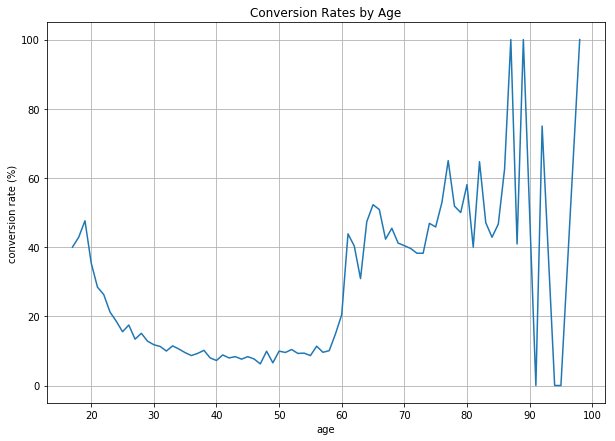

In [19]:
ax = conversions_by_age.plot(
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

###### One thing that is noticeable in the line chart above is the fact that there seems to be lots of noise in old age groups. What is your hypothesis? Can you explore it, prove your hypothesis and solve this?

if you look at the data, this is mostly because the number of clients in this age group is relatively small,compared to other age groups. 

In [19]:
df.groupby('age')['conversion'].count()

age
17       5
18      28
19      42
20      65
21     102
22     137
23     226
24     463
25     598
26     698
27     851
28    1001
29    1453
30    1714
31    1947
32    1846
33    1833
34    1745
35    1759
36    1780
37    1475
38    1407
39    1432
40    1161
41    1278
42    1142
43    1055
44    1011
45    1103
46    1030
      ... 
65      44
66      57
67      26
68      33
69      34
70      47
71      53
72      34
73      34
74      32
75      24
76      34
77      20
78      27
79      14
80      31
81      20
82      17
83      17
84       7
85      15
86       8
87       1
88      22
89       2
91       2
92       4
94       1
95       1
98       2
Name: conversion, Length: 78, dtype: int64

In [20]:
# In order to reduce this unwanted noise, we can group multiple ages together.
df['age_group'] = df['age'].apply(
    lambda x: '[17, 30)' if x < 30 else '[30, 40)' if x < 40 \
        else '[40, 50)' if x < 50 else '[50, 60)' if x < 60 \
        else '[60, 70)' if x < 70 else '70+'
)

 Use **pd.cut**(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise') when wanting to bin values into discrete intervals:
  
- If right == True (the default), then the bins [1, 2, 3, 4] indicate (1,2], (2,3], (3,4]. This argument is ignored when bins is an IntervalIndex.

In [22]:
df['age_group2'] = pd.cut(df['age'], [17, 30, 40, 50, 60, 70, 100], right=False)

In [23]:
df.loc[df['age']==17]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion,conversion2,conversion3,age_group,age_group2
37140,17,student,single,unknown,no,yes,no,cellular,aug,wed,...,92.201,-31.4,0.884,5076.2,no,0,0.0,0,"[17, 30)","[17, 30)"
37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,92.201,-31.4,0.869,5076.2,no,0,0.0,0,"[17, 30)","[17, 30)"
37558,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,92.201,-31.4,0.869,5076.2,no,0,0.0,0,"[17, 30)","[17, 30)"
37579,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,...,92.201,-31.4,0.869,5076.2,yes,1,1.0,1,"[17, 30)","[17, 30)"
38274,17,student,single,unknown,no,no,yes,cellular,oct,tue,...,92.431,-26.9,0.742,5017.5,yes,1,1.0,1,"[17, 30)","[17, 30)"


**Practice:** Now let's re-caluate conversion rate by age_group and plot

In [24]:
conversions_by_age_group = df.groupby(
    'age_group'
)['conversion'].sum() / df.groupby(
    'age_group'
)['conversion'].count() * 100.0

conversions_by_age_group

age_group
70+         47.121535
[17, 30)    16.263891
[30, 40)    10.125162
[40, 50)     7.923238
[50, 60)    10.157389
[60, 70)    34.668508
Name: conversion, dtype: float64

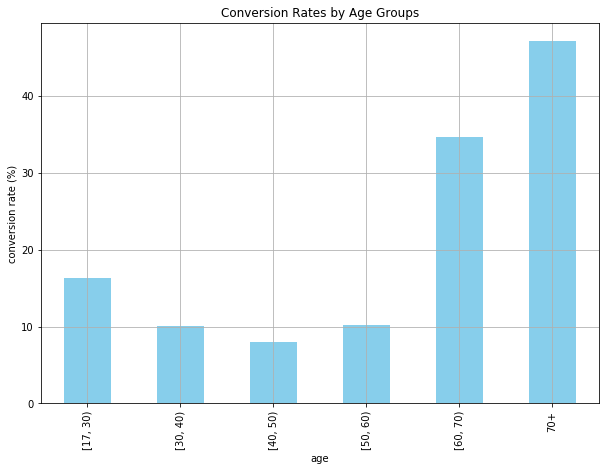

In [25]:
ax = conversions_by_age_group.loc[
    ['[17, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age Groups'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

###### Practice:
One other thing we can look at is conversion rate by marital status

In this exercise, it is your turn to plot the conversion rate by marital status
**Note: there is 'unknown' status for marital status, make sure to remove these people before you do the plotting**
hint: use filter before you do the groupby

In [27]:
conversions_by_marital = df.loc[df['marital'] != 'unknown'].groupby(by='marital')['conversion'].sum() / \
df.loc[df['marital'] != 'unknown'].groupby( by='marital')['conversion'].count() * 100.0

marital
divorced    10.320902
married     10.157253
single      14.004149
Name: conversion, dtype: float64

In [28]:
print(conversions_by_marital)

marital
divorced    10.320902
married     10.157253
single      14.004149
Name: conversion, dtype: float64


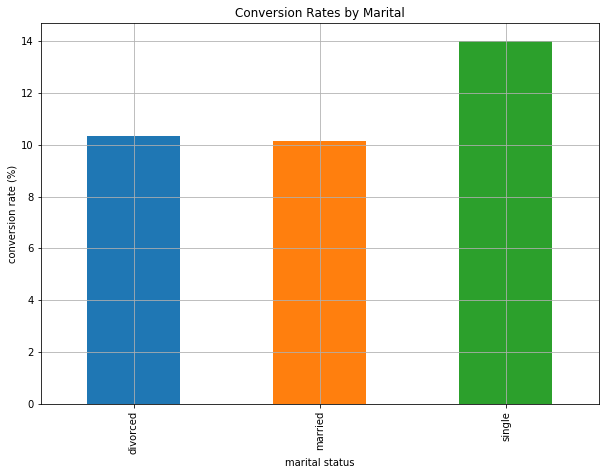

In [32]:
ax = conversions_by_marital.plot(
    kind='bar',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Marital'
)

ax.set_xlabel('marital status')
ax.set_ylabel('conversion rate (%)')

plt.show()

###### Segmenation analysis is one of the most important steps for target marketing campagin